## Reproduces Extended Data Figure 5 in Lauer et al., Nature Methods 2022

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from utils import parse_log

%matplotlib inline

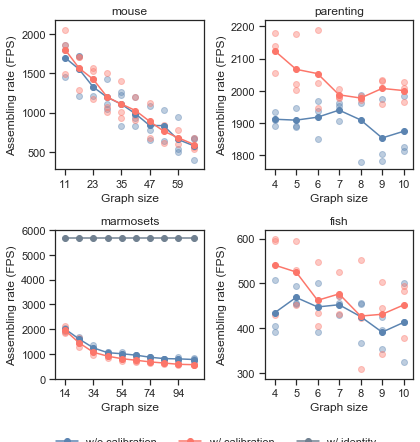

In [2]:
nocalib, nocalib_shuffles = parse_log('../data/figS5/speednocalib.log')
wcalib, wcalib_shuffles = parse_log('../data/figS5/speedwcalib.log')
sns.set_theme(style='ticks')
c_wcalib = '#FC766AFF'
c_nocalib = '#5B84B1FF'

fig, axes = plt.subplots(2, 2, tight_layout=True, figsize=(6, 6))

def plot(ax, results, shuffles, dataset, color, label=None):
    x, y = zip(*results[dataset].items())
    ax.set_title(dataset)
    #ax.set_box_aspect(1)
    ax.set_xlabel('Graph size')
    ax.set_ylabel('Assembling rate (FPS)')
    ax.set_xticks(x if len(x) < 10 else x[::2])
    ax.plot(x, y, '-o', c=color, label=label)
    xx, yy = zip(*shuffles[dataset].items())
    for x, y in zip(xx, yy):
        for val in y:
            ax.scatter(x, val, alpha=0.4, c=color)

plot(axes[0, 0], nocalib, nocalib_shuffles, 'mouse', color=c_nocalib, label='w/o calibration')
plot(axes[0, 1], nocalib, nocalib_shuffles, 'parenting', color=c_nocalib)
plot(axes[1, 0], nocalib, nocalib_shuffles, 'marmosets', color=c_nocalib)
plot(axes[1, 1], nocalib, nocalib_shuffles, 'fish', color=c_nocalib)

plot(axes[0, 0], wcalib, wcalib_shuffles, 'mouse', color=c_wcalib, label='w/ calibration')
plot(axes[0, 1], wcalib, wcalib_shuffles, 'parenting', color=c_wcalib)
plot(axes[1, 0], wcalib, wcalib_shuffles, 'marmosets', color=c_wcalib)
plot(axes[1, 1], wcalib, wcalib_shuffles, 'fish', color=c_wcalib)

x = list(wcalib['marmosets'])
y = len(x) * [5660]  # Hardcoded assembly speed
axes[1, 0].plot(x, y, '-o', c='slategray', label='w/ identity')
axes[1, 0].set_ylim(0, 6000)
fig.align_ylabels()
leg = fig.legend(loc='center', frameon=False, ncol=3,
                    bbox_to_anchor=(0.5, 0.), borderaxespad=0.)
fig.savefig('figS5.jpg',
            dpi=600,
            bbox_extra_artists=(leg,),
            bbox_inches='tight')
